Este breve tutorial explica alguna de las herramientas básicas de Ciencia de Datos disponibles en Python

# ¿Qué es Python?

- Python es un lenguaje de programación interpretado.
- Su nombre proviene de la afición de su creador original, [Guido van Rossum](https://es.wikipedia.org/wiki/Guido_van_Rossum), por los humoristas británicos [Monty Python](https://es.wikipedia.org/wiki/Monty_Python).
- Características:
  - Programación orientada a objetos
  - Programación imperativa
  - Programación funcional.
  - Es multiplataforma y posee una licencia abierta.

Para una introducción a Python, consulta el [taller de Python impartido en el ASL](https://aulasoftwarelibre.github.io/taller-de-python/)

# Entornos de desarrollo para Python

- Entornos de desarrollo para Python
  - [PyCharm](https://www.jetbrains.com/pycharm/)
  - [Spyder](https://github.com/spyder-ide/spyder)
  - [Visual Studio Code](https://code.visualstudio.com/)

Jupyter Notebooks (libros de notas o cuadernos Jupyter)
==================

* Puedes ejecutar un `Cell` (celda) pulsando ``[shift] + [Enter]`` o presionando el botón `Play` en la barra de herramientas.

![](images/ipython_run_cell.png)

* Puedes obtener ayuda sobre una función u objeto presionando ``[shift] + [tab]`` después de los paréntesis de apertura ``function(``

![](images/ipython_help-1.png)

* También puedes obtener la ayuda ejecutando ``function?``

![](images/ipython_help-2.png)

# [NumPy](https://numpy.org/)

Librería de cálculo numérico para Python.
- Escrita en C: operaciones muy rápidas
- Permite trabajar con arrays n-dimensionales (vectores, matrices, etc.)
- Contiene un amplio catálogo de operaciones numércias: creación de matrices, operaciones vectoriales, *slicing*, cálculo matricial, polinomios, tratamiento de señales...

**Todas** las librerías de cálculo científico del ecosistema de Python se basan en NumPy.

A continuación tienes un pequeño ejemplo de operaciones básicas que nos vendrán bien en este tutorial.

In [1]:
import numpy as np

### Creación de arrays

In [2]:
np.zeros((10, 20), dtype=np.float32) # Array de tipo float (32 bits) repleto de 0s, con 10 filas y 20 columnas

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [3]:
np.empty((10, 20, 30), dtype=np.int64) # Array 3D tipo entero (64 bits) no inicializado, con forma 10x20x30

array([[[           8192,             624,               0, ...,
          94419241619040,     42949672961,     51539607553],
        [    42949672980,  94419241619360,               0, ...,
          94419258759648, 140193705924144,               1],
        [   124554051585,    158913789953, 140193794385008, ...,
                       0,               0, 140193344854482],
        ...,
        [              0,               0,               0, ...,
                       0,               0,               0],
        [              0,               0,               0, ...,
                       0,               0,               0],
        [              0,               0,               0, ...,
                       0,               0,               0]],

       [[              0,               0,               0, ...,
                       0,               0,               0],
        [              0,               0,               0, ...,
                       0,             

### Tamaño de un array

In [4]:
array = np.arange(15).reshape((5, 3))
array.shape

(5, 3)

### Indexado y *slicing*

In [5]:
array[3, :].shape

(3,)

In [6]:
array[3].shape

(3,)

In [7]:
array[1:3, 0:1].shape

(2, 1)

### Operaciones sobre arrays

In [8]:
a1 = np.arange(25).reshape((5, 5))
a2 = np.arange(25, 50).reshape((5, 5))

a1 + a2 # Suma

array([[25, 27, 29, 31, 33],
       [35, 37, 39, 41, 43],
       [45, 47, 49, 51, 53],
       [55, 57, 59, 61, 63],
       [65, 67, 69, 71, 73]])

In [9]:
a1 * a2 # Producto elemento a elemento

array([[   0,   26,   54,   84,  116],
       [ 150,  186,  224,  264,  306],
       [ 350,  396,  444,  494,  546],
       [ 600,  656,  714,  774,  836],
       [ 900,  966, 1034, 1104, 1176]])

In [10]:
np.dot(a1, a2) # Producto matricial: (a, b) . (b, c) = (a, c)

array([[ 400,  410,  420,  430,  440],
       [1275, 1310, 1345, 1380, 1415],
       [2150, 2210, 2270, 2330, 2390],
       [3025, 3110, 3195, 3280, 3365],
       [3900, 4010, 4120, 4230, 4340]])

In [11]:
a1.sum() # Suma de todos los elementos

300

In [12]:
a2.sum(axis=0) # Suma de todas las filas

array([175, 180, 185, 190, 195])

# [Matplotlib](https://matplotlib.org/)
Una parte muy importante del aprendizaje automático es la visualización de datos. La herramienta más habitual para esto en Python es Matplotlib. Es un paquete extremadamente flexible y ahora veremos algunos elementos básicos.

Ya que estamos usando los libros (*notebooks*) Jupyter, vamos a usar una de las [funciones mágicas](https://ipython.org/ipython-doc/3/interactive/magics.html) que vienen incluidas en IPython: el modo "*matoplotlib inline*", que dibujará los *plots* directamente en el cuaderno.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

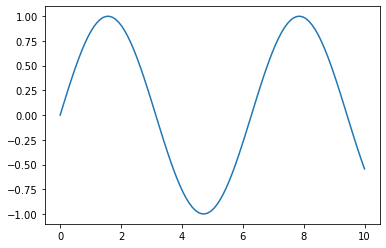

In [14]:
# Dibujar una línea
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x)); # El ; evita que aparezca en la salida de la celda el objeto "plot"

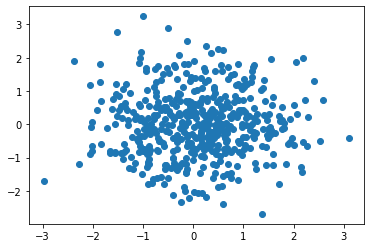

In [15]:
# Dibujar un scatter (dispersión)
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

(100, 100)


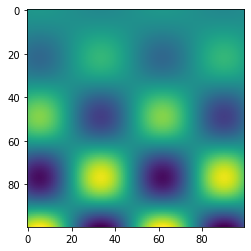

In [16]:
# Mostrar imágenes usando imshow
# - Tener en cuenta que el origen por defecto está arriba a la izquierda

x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]
im = y * np.sin(x) * np.cos(y)
print(im.shape)

plt.imshow(im);

(Esta imagen no es más que [un corte transversal del cruce de la función seno y la función coseno](https://www.google.es/search?dcr=0&ei=cGr8WbKFNsmTa_b1n6AI&q=sin%28x%29*cos%28y%29+from+-6+to+6&oq=sin%28x%29*cos%28y%29+from+-6+to+6&gs_l=psy-ab.3...5574.8328.0.8486.6.5.1.0.0.0.79.355.5.5.0....0...1.1.64.psy-ab..0.0.0....0.3Kq-XpUPDRs))


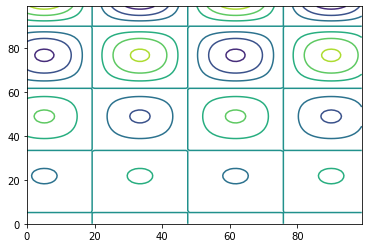

In [17]:
# Hacer un diagrama de curvas de nivel (contour plot)
# - El origen aquí está abajo a la izquierda
plt.contour(im);

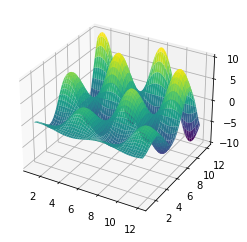

In [18]:
# El modo "widget" en lugar de inline permite que los plots sean interactivos
# %matplotlib widget
# Plot en 3D
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);

Hay muchísimos tipos de gráficos disponibles. Una forma útila de explorarlos es mirar la [galería de matplotlib](http://matplotlib.org/gallery.html).

Prueba alguno de estos ejemplos. Por ejemplo, `https://matplotlib.org/mpl_examples/shapes_and_collections/path_patch_demo.py`:


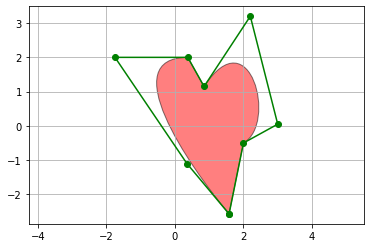

In [19]:
"""
Demo of a PathPatch object.
"""
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()


# [`pandas`](https://pandas.pydata.org/)

Herramienta de análisis de datos muy flexible construída sobre NumPy.

Nos permite trabajar sobre "DataFrames" (datos tabulados) con indices de tipo arbitrario (pueden ser numéricos, etiquetas, fechas...)

<img src="images/table_dataframe.svg" width="40%">

Incluye herramientas para cargar/guardar datos en distintos formatos (CSV, Calc/Excel, JSON...)

### Carga de datos

El método `read_csv()` de `pandas` permite dos modos de trabajo: que el propio fichero CSV tenga una fila con los nombres de las variables o que nosotros especifiquemos los nombres de las variables en la llamada. En este caso, vamos a utilizar la segunda aproximación. De esta forma, creamos un array con los nombres de las variables:

In [22]:
import pandas as pd

nombre_variables = ['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase']
# Carga de datos desde la web: descarga el CSV y lo carga como DataFrame
iris = pd.read_csv('https://raw.githubusercontent.com/ayrna/tutorial-scikit-learn-IMC/master/data/iris.csv',
                   names = nombre_variables)
iris.head(10) # Sólo las 10 primeras filas

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Se trata del dataset "iris", un ejemplo típico en *machine learning*.  En esta base de datos hay tres clases a predecir, que son tres especies distintas del género *Iris*, de manera que, para cada flor, se extraen cuatro medidas o variables de entrada (longitud y ancho de los pétalos y los sépalos, en cm). Las tres especies a distinguir son *Iris setosa*, *Iris virginica* e *Iris versicolor*.

<figure>
<img src="images/iris-machinelearning.png" width="60%">
    <figcaption>Imagen extraída de <a href="https://www.datacamp.com/community/tutorials/machine-learning-in-r">Machine Learning in R for beginners</a></figcaption>
</figure>

## Inspección de datos

Antes de nada, es conveniente realizar una pequeña **inspección** de los datos. Si simplemente queremos ver la cabecera del dataset, podemos utilizar el método `head(n)`, que devuelve un DataFrame incluyendo los primeros `n` patrones:

In [28]:
iris.head(9)

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


Estos datos tienen cuatro dimensiones, pero podemos visualizar una o dos de las dimensiones usando un histograma o un scatter. Primero, activamos el *matplotlib inline mode*:

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
colors = ['blue', 'red', 'green'] # Color para cada clase
iris_target_names = np.unique(iris['clase'])
iris_target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

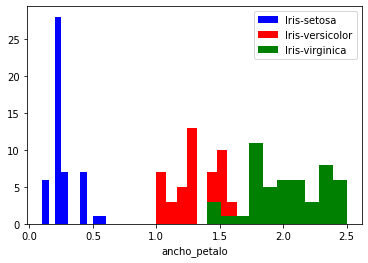

In [37]:
variable = 'ancho_petalo'
colors = ['blue', 'red', 'green'] # Color para cada clase
iris_target_names = np.unique(iris['clase'])

for indice, color in zip(range(len(iris_target_names)), colors): #¿qué hace zip?
    #Separamos el conjunto en las distintas clases
    patrones = (iris['clase']==iris_target_names[indice]) #esta comparación la explicaremos más adelante
    plt.hist(iris.loc[patrones, variable], label=iris_target_names[indice], color=color)

plt.xlabel(variable)
plt.legend(loc='upper right')
plt.show()

Recuerda que las variables de entrada eran *['longitud_sepalo', 'ancho_sepalo', 'longitud_petalo', 'ancho_petalo', 'clase']*, sabiendo esto, ¿qué debemos modificar  en el código superior para mostrar la longitud del sépalo? 

A continuación vamos a representar en un gráfico la relación entre dos variables de entrada, así podremos ver si los patrones tienen algunas características que nos ayuden a crear un modelo lineal. Prueba distintas combinaciones de variables que se representan en los ejes, para ello modifica los valores de *vairable_x* y *variable_y*.

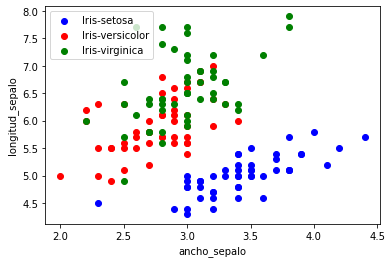

In [39]:
variable_x = 'ancho_sepalo'
variable_y = 'longitud_sepalo'

colors = ['blue', 'red', 'green']

for indice, color in zip(range(len(iris_target_names)), colors): #¿qué hace zip?
    patrones = (iris['clase']==iris_target_names[indice])
    plt.scatter(iris.loc[patrones, variable_x], 
                iris.loc[patrones, variable_y],
                label=iris_target_names[indice],
                c=color)

plt.xlabel(variable_x)
plt.ylabel(variable_y)
plt.legend(loc='upper left')
plt.show()

¿Has encontrado alguna combinación que haga que los datos sean linealmente separables?
Es un poco tedioso probar todas las posibles combinaciones, ¡y eso que en este ejemplo tenemos pocas variables!

### Matrices scatterplot

En lugar de realizar los plots por separado, una herramienta común que utilizan los analistas son las **matrices scatterplot**.

Estas matrices muestran los scatter plots entre todas las características del dataset, así como los histogramas para ver la distribución de cada característica.

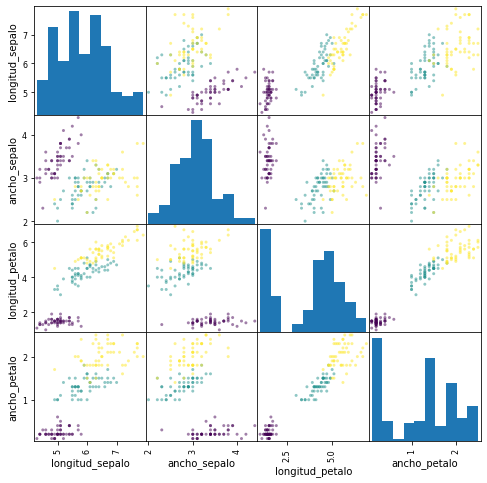

In [44]:
import pandas as pd

clases_numeros, clases_nombres = pd.factorize(iris['clase'])

iris_df = pd.DataFrame(iris[nombre_variables], columns=nombre_variables)

pd.plotting.scatter_matrix(iris_df, c=clases_numeros, figsize=(8, 8));

## Manejo de objetos `DataFrame` y matrices numpy (`ndarray`)

Los [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) son objetos que representan a los *datasets* con los que vamos a operar. Permiten realizar muchas operaciones de forma automática, ayudando a transformar las variables de forma muy cómoda. Internamente, el dataset se guarda en un array bidimensional de `numpy` (clase [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)). El acceso a los elementos de un [`DataFrame`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) es algo más simple si utilizamos su versión [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), para lo cual simplemente tenemos que utilizar el atributo `values`:

In [45]:
iris_array = iris.values
print(iris_array[:,0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


La sintaxis de indexación en un [`ndarray`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) es la siguiente:
- `array[i,j]`: accede al valor de la fila `i` columna `j`.
- `array[i:j,k]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a la columna `k`.
- `array[i:j,k:l]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y a las columnas desde la `k` hasta la `l`.
- `array[i:j,:]`: devuelve otro `ndarray` con la submatriz correspondiente a las filas desde la `i` hasta la `j-1` y **todas** las columnas.
- `array[:,i:j]`: devuelve otro `ndarray` con la submatriz correspondiente a **todas** las filas y a las columnas desde la `k` hasta la `l`.
De esta forma:

In [46]:
# Mostrar el array es menos bonito
iris_array[0:2,2:4]

array([[1.4, 0.2],
       [1.4, 0.2]], dtype=object)

In [47]:
# Mostrar el "pandas" siempre es vistoso
iris[0:2][nombre_variables[2:4]]

,longitud_petalo,ancho_petalo
0,1.4,0.2
1,1.4,0.2


In [48]:
iris_array[1:6,:]

array([[4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa']], dtype=object)

In [49]:
iris[1:6][nombre_variables[:]]

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Vemos que el acceso a través del `ndarray` es, por lo general, más cómodo, ya que no requerimos del nombre de las variables, aunque es menos explícito. Ahora vamos a manejar una matriz de valores aleatorios, para ver algunas características adicionales.

In [50]:
import numpy as np

# Semilla de números aleatorios (para reproducibilidad)
rnd = np.random.RandomState(seed=123)

# Generar una matriz aleatoria
X = rnd.uniform(low=0.0, high=1.0, size=(3, 5))  # dimensiones 3x5

X

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426]])

(tened en cuenta que los arrays en numpy se indexan desde el 0, al igual que la mayoría de estructuras en Python)

In [51]:
# Acceder a los elementos

# Obtener un único elemento
# (primera fila, primera columna)
print(X[0, 0])

# Obtener una fila
# (segunda fila)
print(X[1])

# Obtener una columna
# (segunda columna)
print(X[:, 1])

0.6964691855978616
[0.42310646 0.9807642  0.68482974 0.4809319  0.39211752]
[0.28613933 0.9807642  0.72904971]


$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [52]:
# Obtener la traspuesta
print(X.T)

[[0.69646919 0.42310646 0.34317802]
 [0.28613933 0.9807642  0.72904971]
 [0.22685145 0.68482974 0.43857224]
 [0.55131477 0.4809319  0.0596779 ]
 [0.71946897 0.39211752 0.39804426]]


In [53]:
# Crear un vector fila de números con la misma separación
# sobre un intervalo prefijado
y = np.linspace(start=0, stop=12, num=5)
print(y)

[ 0.  3.  6.  9. 12.]


In [ ]:
# Transformar el vector fila en un vector columna
print(y[:, np.newaxis])

In [55]:
# Indexar según un conjunto de números enteros
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[0.55131477, 0.28613933, 0.69646919],
       [0.4809319 , 0.9807642 , 0.42310646],
       [0.0596779 , 0.72904971, 0.34317802]])

## Vectorización de operaciones

Cuando usamos NumPy en Python, al igual que en otros lenguajes de programación como R o Matlab, debemos intentar, siempre que sea posible, *vectorizar* las operaciones. Esto es utilizar operaciones matriciales en lugar de bucles que recorran los arrays. La razón es que este tipo de operaciones están muchos más optimizadas y que el proceso de referenciación de *arrays* puede consumir mucho tiempo.

Imaginemos que queremos imprimir el área de sépalo de todas las flores. Compara la diferencia entre hacerlo mediante un bucle `for` y mediante operaciones matriciales:

In [58]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando un for:

# Crear un array vacío
areaSepaloArray = np.empty(iris_array.shape[0], dtype=iris_array.dtype)

# Bucle for 
for i in range(iris_array.shape[0]):
    areaSepaloArray[i] = iris_array[i,0] * iris_array[i,1]
    
print(areaSepaloArray)

[17.849999999999998 14.700000000000001 15.040000000000001 14.26 18.0
 21.060000000000002 15.639999999999999 17.0 12.76 15.190000000000001
 19.980000000000004 16.32 14.399999999999999 12.899999999999999 23.2
 25.080000000000002 21.060000000000002 17.849999999999998 21.66 19.38
 18.36 18.87 16.56 16.83 16.32 15.0 17.0 18.2 17.68 15.040000000000001
 14.879999999999999 18.36 21.32 23.1 15.190000000000001 16.0 19.25
 15.190000000000001 13.200000000000001 17.34 17.5 10.35 14.080000000000002
 17.5 19.38 14.399999999999999 19.38 14.719999999999999 19.61 16.5
 22.400000000000002 20.480000000000004 21.39 12.649999999999999 18.2
 15.959999999999999 20.79 11.76 19.139999999999997 14.040000000000001 10.0
 17.700000000000003 13.200000000000001 17.689999999999998 16.24 20.77
 16.799999999999997 15.66 13.640000000000002 14.0 18.880000000000003 17.08
 15.75 17.08 18.56 19.799999999999997 19.04 20.1 17.4 14.82 13.2 13.2
 15.66 16.200000000000003 16.200000000000003 20.4 20.77 14.489999999999998
 16.79999

In [57]:
# Generar un array con el área del sépalo (longitud*anchura), utilizando operaciones matriciales
areaSepaloArray_2 = iris_array[:,0] * iris_array[:,1]
print (areaSepaloArray_2)

[17.849999999999998 14.700000000000001 15.040000000000001 14.26 18.0
 21.060000000000002 15.639999999999999 17.0 12.76 15.190000000000001
 19.980000000000004 16.32 14.399999999999999 12.899999999999999 23.2
 25.080000000000002 21.060000000000002 17.849999999999998 21.66 19.38
 18.36 18.87 16.56 16.83 16.32 15.0 17.0 18.2 17.68 15.040000000000001
 14.879999999999999 18.36 21.32 23.1 15.190000000000001 16.0 19.25
 15.190000000000001 13.200000000000001 17.34 17.5 10.35 14.080000000000002
 17.5 19.38 14.399999999999999 19.38 14.719999999999999 19.61 16.5
 22.400000000000002 20.480000000000004 21.39 12.649999999999999 18.2
 15.959999999999999 20.79 11.76 19.139999999999997 14.040000000000001 10.0
 17.700000000000003 13.200000000000001 17.689999999999998 16.24 20.77
 16.799999999999997 15.66 13.640000000000002 14.0 18.880000000000003 17.08
 15.75 17.08 18.56 19.799999999999997 19.04 20.1 17.4 14.82 13.2 13.2
 15.66 16.200000000000003 16.200000000000003 20.4 20.77 14.489999999999998
 16.79999

Es más, los `ndarray` permiten aplicar operaciones lógicas, que devuelven otro `ndarray` con el resultado de realizar esas operaciones lógicas:
¿Qué patrones tienen la longitud del pétalo (variable 2) mayor a 5 unidades?

In [59]:
iris_array[:,2] > 5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,

A su vez, este `ndarray` se puede usar para indexar el `ndarray` original:
¿cuál es la clase de los patrones que tienen la longitud del pétalo mayor que 5 unidades?

In [60]:
iris_array[iris_array[:,2] > 5,4]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Imagina que ahora queremos imprimir la longitud de sépalo de aquellas flores cuya longitud de sépalo es mayor que 2. Compara la versión con `for` y la versión "vectorizada":

In [61]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando un for
iris_array = iris.values
for i in range(0,iris_array.shape[0]):
    valorSepalo = iris_array[i,0]
    if valorSepalo > 2:
        print(valorSepalo)

5.1
4.9
4.7
4.6
5.0
5.4
4.6
5.0
4.4
4.9
5.4
4.8
4.8
4.3
5.8
5.7
5.4
5.1
5.7
5.1
5.4
5.1
4.6
5.1
4.8
5.0
5.0
5.2
5.2
4.7
4.8
5.4
5.2
5.5
4.9
5.0
5.5
4.9
4.4
5.1
5.0
4.5
4.4
5.0
5.1
4.8
5.1
4.6
5.3
5.0
7.0
6.4
6.9
5.5
6.5
5.7
6.3
4.9
6.6
5.2
5.0
5.9
6.0
6.1
5.6
6.7
5.6
5.8
6.2
5.6
5.9
6.1
6.3
6.1
6.4
6.6
6.8
6.7
6.0
5.7
5.5
5.5
5.8
6.0
5.4
6.0
6.7
6.3
5.6
5.5
5.5
6.1
5.8
5.0
5.6
5.7
5.7
6.2
5.1
5.7
6.3
5.8
7.1
6.3
6.5
7.6
4.9
7.3
6.7
7.2
6.5
6.4
6.8
5.7
5.8
6.4
6.5
7.7
7.7
6.0
6.9
5.6
7.7
6.3
6.7
7.2
6.2
6.1
6.4
7.2
7.4
7.9
6.4
6.3
6.1
7.7
6.3
6.4
6.0
6.9
6.7
6.9
5.8
6.8
6.7
6.7
6.3
6.5
6.2
5.9


In [62]:
# Imprimir las longitudes de sépalo mayores que 2, utilizando operaciones matriciales
print(iris_array[ iris_array[:,0] > 2, 0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


Podemos usar algunas funciones adicionales sobre objetos de tipo `ndarray`. Por ejemplo, las funciones [`numpy.mean`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) y [`numpy.std`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html) nos sirven para calcular la media y la desviación típica, respectivamente, de los valores contenidos en el `ndarray` que se pasa como argumento.

Por último, podemos realizar operaciones matriciales con los `ndarray` de forma muy simple y optimizada. La función [`numpy.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) multiplica dos `ndarray`, siempre que sus dimensiones sean compatibles. La función [`numpy.transpose`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) nos devuelve la traspuesta de la matriz.

In [63]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]

np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [64]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [65]:
np.transpose(x)

array([[0, 2],
       [1, 3]])

In [66]:
x.T

array([[0, 2],
       [1, 3]])

**Ejercicio**: Prueba a imprimir la media y la desviación típica del área de sépalo aquellas flores que son de tipo *virginica*.

# `scikit-learn`
- Librería que proporciona un amplio conjunto de algoritmos de aprendizaje supervisado y no supervisado a través de una consistente interfaz en Python.
- Publicado bajo licencia BSD y distribuido en muchos sistemas Linux, favorece el uso comercial y educacional.
- Esta librería se ha construido sobre [`SciPy`](http://www.scipy.org/) (*Scientific Python*), la cual ofrece funcionalidad adicional sobre NumPy (algoritmos de grafos, árboles, distancias...)
- Se centra en el modelado de datos y no en cargar y manipular los datos, para lo que utilizaríamos NumPy y `pandas`. Algunas cosas que podemos hacer con `scikit-learn` son:
  - Agrupamiento (*clustering*)
  - Validación cruzada
  - *Datasets* de prueba
  - Reducción de la dimensionalidad
  - Métodos *ensemble*
  - Selección de características (*feature selection*)
  - Ajuste de parámetros (*parameter tuning*)
- Las principales ventajas de `scikit-learn` son las siguientes:
  - Interfaz consistente ante modelos de aprendizaje automático.
  - Proporciona muchos parámetros de configuración.
  - Documentación excepcional.
  - Desarrollo muy activo.
  - Comunidad.

## División de datos en entrenamiento y test

Aunque a veces nos proporcionan los datos ya divididos en los conjuntos de entrenamiento y test, conviene saber como podríamos realizar esta división. El siguiente código muestra una función que divide los datos de forma aleatoria, utilizando operaciones *vectorizadas*:

In [74]:
def dividir_ent_test(dataframe, porcentaje=0.6):
    """ 
    Función que divide un DataFrame aleatoriamente en entrenamiento y en test.
    Recibe los siguientes argumentos:
    - dataframe: DataFrame que vamos a utilizar para extraer los datos
    - porcentaje: porcentaje de patrones en entrenamiento
    Devuelve:
    - train: DataFrame con los datos de entrenamiento
    - test: DataFrame con los datos de test
    """
    mascara = np.random.rand(len(dataframe)) < porcentaje
    train = dataframe[mascara]
    test = dataframe[~mascara] #¿para qué sirve ~?
    return train, test

In [75]:
iris_train, iris_test = dividir_ent_test(iris)

In [76]:
iris_train

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [77]:
iris_test

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa


Ahora, podemos quedarnos con las columnas correspondientes a las variables de entrada (todas salvo la última) y la correspondiente a la variable de salida (en este caso, la última):

In [78]:
train_inputs_iris = iris_train.values[:,0:-1]
train_outputs_iris = iris_train.values[:,-1]

test_inputs_iris = iris_test.values[:,0:-1]
test_outputs_iris = iris_test.values[:,-1]

print(train_inputs_iris.shape)

(92, 4)


Si nos proporcionan la base de datos completa para que hagamos nosotros las particiones, todas las clases y funciones del módulo [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) de `scikit-learn` nos pueden facilitar mucho la labor.

In [80]:
from sklearn.model_selection import train_test_split

inputs_iris = iris.values[:,0:-1]
outputs_iris = iris.values[:,-1]

train_inputs_iris, test_inputs_iris, train_outputs_iris, test_outputs_iris = \
       train_test_split(inputs_iris, outputs_iris, test_size=0.33, random_state=42, stratify=outputs_iris)

print(train_inputs_iris.shape)
print(test_inputs_iris.shape)
print([sum(train_outputs_iris==etiqueta)/train_outputs_iris.shape[0] for etiqueta in np.unique(outputs_iris)])

(100, 4)
(50, 4)
[0.34, 0.33, 0.33]


## Labores de preprocesamiento

Sin embargo, `scikit-learn` no acepta cadenas como parámetros de las funciones, todo deben de ser números. Para ello, nos podemos valer del objeto [`sklearn.preprocessing.LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), que nos transforma automáticamente las cadenas a números. La forma en que se utiliza es la siguiente:

In [81]:
#Creación del método
label_e = preprocessing.LabelEncoder()

#Entrenamiento del método
label_e.fit(train_outputs_iris)

#Obtención de salidas
train_outputs_iris_encoded = label_e.transform(train_outputs_iris)
test_outputs_iris_encoded = label_e.transform(test_outputs_iris)

Como podéis observar, primero se crea el `LabelEncoder` y luego se "entrena" mediante el método `fit`. Para un `LabelEncoder`, "entrenar" el modelo es decidir el mapeo que vimos anteriormente, en este caso:
- `Iris-setosa` -> 0
- `Iris-versicolor` -> 1
- `Iris-virginica` -> 2

Una vez entrenado, utilizando el método `transform` del `LabelEncoder`, podremos transformar cualquier `ndarray` que queramos (hubiéramos tenido un error si alguna de las etiquetas de test no estuviera en train). Esta estructura (método `fit` más método `transform` o `predict`) se repite en muchos de los objetos de `scikit-learn`.

Hay muchas más tareas de preprocesamiento que se pueden hacer en `scikit-learn`. Consulta el paquete [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

## Crear y evaluar un clasificador

A continuación, vamos a crear un modelo de clasificación y a obtener su matriz de confusión. Vamos a utilizar el clasificador [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), que clasifica cada patrón asignándole la clase mayoritaria según los `k` vecinos más cercanos al patrón a clasificar. Consulta siempre la documentación de cada objeto para ver los parámetros del algoritmo (en este caso, el parámetro decisivo es `n_neighbors`). Veamos como se realizaría el entrenamiento:

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_inputs_iris, train_outputs_iris_encoded)
print(knn)

KNeighborsClassifier(n_neighbors=3)


Ya tenemos el modelo entrenado. Este modelo es de tipo *lazy*, en el sentido de que no existen parámetros a ajustar durante el entrenamiento. Lo único que hacemos es acomodar las entradas en una serie de estructuras de datos que faciliten el cálculo de distancias a la hora de predecir la etiqueta de datos nuevos. Si ahora queremos predecir las etiquetas de test, podemos hacer uso del método `predict`, que aplica el modelo ya entrenado a datos nuevos:

In [85]:
prediccion_test = knn.predict(test_inputs_iris)
print(prediccion_test)
print(test_outputs_iris_encoded)

[1 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 2 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 2 1 2 1 1 2]
[2 1 0 1 2 1 1 0 1 1 0 0 0 0 0 2 2 1 2 1 2 1 0 2 0 2 2 0 0 2 2 2 0 1 0 0 2
 1 1 1 1 1 0 0 2 1 2 2 1 2]


Si queremos saber cómo de buena ha sido la clasificación, todo modelo de clasificación o regresión en `scikit-learn` tiene un método `score` que nos devuelve la bondad del modelo con respecto a los valores esperados, a partir de las entradas suministradas. La medida por defecto utilizada en [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) es el porcentaje de patrones bien clasificados (CCR o *accuracy*). La función se utiliza de la siguiente forma (internamente, esta función llama a `predict`):

In [86]:
precision = knn.score(test_inputs_iris, test_outputs_iris_encoded)
precision

0.96

Esto sería similar a hacer la comparación a mano y calcular la media:

In [87]:
np.mean(prediccion_test == test_outputs_iris_encoded)

0.96

Para imprimir la matriz de confusión de unas predicciones, podemos utilizar la función [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix), que nos va devolver la matriz ya formada:

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_outputs_iris_encoded, prediccion_test)
print(cm)

[[16  0  0]
 [ 0 17  0]
 [ 0  2 15]]


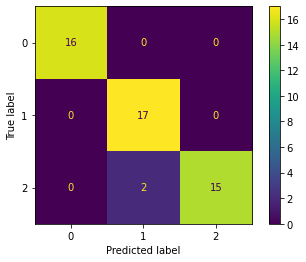

In [89]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, test_inputs_iris, test_outputs_iris_encoded)

## Configurar los parámetros de un clasificador

Imagina que quieres configurar el número de vecinos más cercanos (`n_neighbors`), de forma que la precisión en entrenamiento sea lo más alta posible. Lo podríamos hacer de la siguiente forma:

In [91]:
for nn in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(train_inputs_iris, train_outputs_iris_encoded)
    precisionTrain = knn.score(train_inputs_iris, train_outputs_iris_encoded)
    precisionTest = knn.score(test_inputs_iris, test_outputs_iris_encoded)
    print("%d vecinos: \tCCR train = %.2f%%, \tCCR test = %.2f%%" % (nn, precisionTrain*100, precisionTest*100))

1 vecinos: 	CCR train = 100.00%, 	CCR test = 94.00%
2 vecinos: 	CCR train = 99.00%, 	CCR test = 92.00%
3 vecinos: 	CCR train = 96.00%, 	CCR test = 96.00%
4 vecinos: 	CCR train = 98.00%, 	CCR test = 96.00%
5 vecinos: 	CCR train = 96.00%, 	CCR test = 98.00%
6 vecinos: 	CCR train = 95.00%, 	CCR test = 94.00%
7 vecinos: 	CCR train = 97.00%, 	CCR test = 98.00%
8 vecinos: 	CCR train = 97.00%, 	CCR test = 96.00%
9 vecinos: 	CCR train = 97.00%, 	CCR test = 96.00%
10 vecinos: 	CCR train = 97.00%, 	CCR test = 96.00%
11 vecinos: 	CCR train = 98.00%, 	CCR test = 96.00%
12 vecinos: 	CCR train = 98.00%, 	CCR test = 96.00%
13 vecinos: 	CCR train = 98.00%, 	CCR test = 94.00%
14 vecinos: 	CCR train = 98.00%, 	CCR test = 96.00%


# Ejercicio propuesto para realizar

Debes utilizar la base de datos `german` para entrenar dos modelos supervisados de clasificación:
- Uno basado en los k vecinos más cercanos: [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).
- Otro basado en un modelo lineal. Vamos a utilizar el modelo de regresión logística: [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

La base de datos está disponible en la UCI, bajo el nombre [*Statlog (German Credit Data) Data Set*](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29). Bájala y preprocésala para realizar el entrenamiento (utiliza la versión numérica, `german.data-numeric`, observa que los datos no tienen cabecera y utiliza el método `read_csv` de `pandas` especificando correctamente el separador, que en este caso es el uno o más espacios, es decir, `'\s+'`). Divide los datos en 60% de entrenamiento y 40% de test (utiliza la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)). Tienes que normalizar todas las variables de entrada para que queden en el intervalo `[0,1]` (consulta información sobre [MinMaxScaler](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range)). Intenta ajustar lo mejor posibles los parámetros de los clasificadores.

# Referencias
Este tutorial se ha basado en gran parte en el siguiente material:
- Python como alternativa a R en *machine learning*. Mario Pérez Esteso. [Enlace a Github](https://github.com/MarioPerezEsteso/Python-Machine-Learning). [Enlace a Youtube](https://www.youtube.com/watch?v=8yz4gWt7Klk). 
- Tutorial de Alex Gramfort y Andreas Mueller [[Github]](https://github.com/amueller/scipy-2017-sklearn)[[Youtube1]](https://www.youtube.com/watch?v=2kT6QOVSgSg)[[Youtube2]](https://www.youtube.com/watch?v=WLYzSas511I)

Se recomiendan los siguientes tutoriales adicionales para aprender más sobre el manejo de la librería:
- *An introduction to machine learning with scikit-learn*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/basic/tutorial.html](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).
- *A tutorial on statistical-learning for scientific data processing*. Documentación oficial de `scikit-learn`. [http://scikit-learn.org/stable/tutorial/statistical_inference/index.html](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

Por último, para aprender la sintaxis básica de Python en menos de 13 horas, se recomienda el siguiente curso de *CodeAcademy*:
- Curso de Python de CodeAcademy. [https://www.codecademy.com/es/learn/python](https://www.codecademy.com/es/learn/python)